# Torneo de Piedra, Papel o Tijeras

**Piedra, papel o tijeras** es un juego muy antiguo que es comúnmente usado para tomar pequeñas decisiones entre grupos de personas, esto de una forma divertida y dinámica. A pesar de que su origen es incierto, muchos afirman que la primera mención a este juego fue en un libro de origen chino conocido como *Wazuzu (1600 a.C.)*, y que a partir de ahí ha ido evolucionando de cultura en cultura recibiendo nombres como *Jankenpon, Cham-chaum*, etc.

A pesar de que existen muchas variaciones, el modo de juego más popular es aquel donde las tijeras vencen al papel, el papel a la piedra, y la piedra a las tijeras (Japan House, 2022).


<left>
<img src="https://media.tenor.com/oxiwETTwLLAAAAAC/piedra-papel-tijera.gifwidth=250 height=250 />"
</left>

## Reglas

Cada año el país de México lleva a cabo un torneo de “piedra, papel o tijera” donde durante 50 rondas, 10 mil participantes compiten por no ser eliminados.

En esta competencia, cada participante tiene a su **alrededor 8 personas** con las cuales deberá de jugar (estas se encuentran adyacentes en formato horizontal, vertical y diagonal). Los enfrentamientos se van haciendo en conjuntos de dos personas.

Existen **dos tipos de jugadores, “activos” y “eliminados”**.
Sólo aquellos que son del mismo tipo pueden jugar entre sí.
En un inicio todos comienzan el torneo en estado “activo”.

---------

**Las reglas del torneo son las siguientes:**

Cuando dos jugadores “eliminados” empatan regresan al estado “activo”.
1. El empate se considera cuando ambos utilizan el mismo objeto durante el enfrentamiento.
2. Cuando un jugador pierde su partida pasa automáticamente al estado “eliminado.

Un participante puede **perder** su partida si hace lo siguiente:

1. Utiliza piedra contra alguien que usó papel.
2. Utiliza tijera contra alguien que usa piedra.
3. Utiliza papel contra alguien que usa tijera.

Por otro lado, un participante puede **ganar** su partida si hace lo siguiente:

1. Utiliza piedra contra alguien que usó tijera.
2. Utiliza tijera contra alguien que usa papel.
3. Utiliza papel contra alguien que usa piedra.

------
Cada vez que se cambia de contrincante el jugador se ve obligado a reformular su jugada.

Al finalizar el torneo se premian a todos los participantes que se encuentran en estado “activo”.


In [ ]:
!python3 -m pip install mesa

## Imports

Antes de empezar a crear el modelo del juego de la vida con multiagentes es necesario tener instalado los siguientes paquetes:
- `python`: asegúrense de usar la versión 3+.
- `mesa`: el framework de Python para el modelado de agentes.
- `numpy`: es una biblioteca de Python para el manejo de matrices, arreglos, manipulación matemática, lógica y mucho más.
- `matplotlib`: es una biblioteca para crear visualizaciones estáticas, animadas e interactivas en Python.

Para poder modelar el juego de la vida usando el framework de `mesa` es necesario importar dos clases: una para el modelo general, y otro para los agentes.

In [13]:
# 'Model' sirve para definir los atributos a nivel del modelo, maneja los agentes
# 'Agent' es la unidad atómica y puede ser contenido en múltiples instancias en los modelos
from mesa import Agent, Model

# 'SingleGrid' sirve para forzar a un solo objeto por celda (nuestro objetivo en este "juego")
from mesa.space import SingleGrid

# 'SimultaneousActivation' habilita la opción de activar todos los agentes de manera simultanea.
from mesa.time import SimultaneousActivation

# 'DataCollector' permite obtener el grid completo a cada paso (o generación), útil para visualizar
from mesa.datacollection import DataCollector

# 'matplotlib' lo usamos para graficar/visualizar como evoluciona el autómata del torneo.
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mlp
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
mlp.rcParams['animation.embed_limit'] = 2**128

# Definimos los siguientes paquetes para manejar valores númericos: 'numpy' & 'pandas'
import numpy as np
import pandas as pd

# Definimos otros paquetes que vamos a usar para medir el tiempo de ejecución de nuestro algoritmo.
import time
import datetime

## Crear el modelo

Antes que nada el presente modelo se encuentra basado en el [tutorial introductorio](https://mesa.readthedocs.io/en/latest/tutorials/intro_tutorial.html). Se modificó para que funcionara con el presente problema pero en esencia es lo mismo.

In [14]:
class GameLifeAgent(Agent):
    """
    Representa a un agente o una celda con estado activo (1) o eliminado (0)
    """
    def __init__(self, unique_id, model):
        """
        Crea un agente con estado inicial 1, también se le asigna un identificador
        formado por una tupla (x,y). Se define un nuevo estado cuyo valor será definido por las
        reglas mencionadas arriba.
        Adicionalmente, se le asigna una jugada aleatoria (piedra, papel o tijera) como jugada inicial.
        """
        super().__init__(unique_id, model) #id
        self.live = 1; # estado
        self.mano = np.random.choice(["piedra", "papel", "tijera"]) # jugada
        self.next_state = None # siguiente estado

    def step(self):
        """
        Este método es el que calcula si el participante se mantendrá activo o será eliminado, esto dependiendo de las jugadas de sus vecinos.
        Esta es la dinámica principal del juego de la vida (torneo de piedra, papel o tijera). Por lo tanto, el estado "activo"" de la
        siguiente ronda no se cambia aquí, solo se almacena en self.next_state. La idea consiste
        en esperar a que todos los agentes calculen su estado y una vez hecho esto, hacer el cambio.
        """
        # 1) Se checa la existencia de participantes vecinos
        neighbours = self.model.grid.get_neighbors(
            self.pos,
            moore=True, # true = se consideran esquinas
            include_center=False)

        # Si no hay cambios en el jugador, este mantiene el mismo estado en la siguiente ronda
        self.next_state = self.live

        # 2) Función para jugar "piedra, papel o tijera"
        def partida_PPT(self, opponente):
          if self.next_state == 1 and opponente.next_state == 1:
            if self.mano == "piedra" and opponente.mano == "papel": # Caso de derrota 1
              self.next_state = 0
            elif self.mano == "tijera" and opponente.mano == "piedra": # Caso de derrota 2
              self.next_state = 0
            elif self.mano == "papel" and opponente.mano == "tijera": # Caso de derrota 3
              self.next_state = 0
          elif self.next_state == 0 and opponente.next_state == 0 and self.mano == opponente.mano: # Revivir: En caso de empate entre 2 jugadores previamente eliminados
              self.next_state = 1

          # El jugador calcula su proxima jugada (cambia su mano)
          self.mano = np.random.choice(["piedra", "papel", "tijera"])

        # 3) Se juega una partida con cada vecino
        for vecino in neighbours:
              partida_PPT(self, vecino) # Se juega 1 partida de Piedra, Papel o Tijera

    def advance(self):
        """
        Define el nuevo estado calculado del método step.
        """
        self.live = self.next_state

class GameLifeModel(Model):
    """
    Define el modelo del juego de la vida.
    """
    def __init__(self, width, height):
        self.width = width
        self.height = height

        # Da inicio a todo
        self.reset()

    def reset(self):
        self.num_agents = self.width * self.height
        self.grid = SingleGrid(self.width, self.height, True)
        self.schedule = SimultaneousActivation(self)

        # se importa arriba: import random
        # celdas = model.grid.coord_iter()
        # celdas_con_arboles = random.sample(celdas, k=25)
        # posiciones_arboles = [pos for _, pos in celdas_con_arboles]

        for (content, pos) in self.grid.coord_iter():
            # if pos in posiciones_arboles
                # código para instanciar árbol

            a = GameLifeAgent(pos, self) # pos está actuando como id
            self.grid.place_agent(a, pos)
            self.schedule.add(a) # en cada step del modelo ejecuta el step de los agentes

        # Aquí definimos el colector de datos para obtener el grid completo.
        self.datacollector = DataCollector(
            model_reporters={"Grid": self.get_grid,
                             "Live": self.get_live}
        )

    def step(self): # No cambia usualmente
        """
        En cada paso el colector toma la información que se definió y almacena el grid para luego
        graficarlo.
        """
        self.datacollector.collect(self)
        self.schedule.step()

    def get_grid(self):
        """
        Esta es una función auxiliar que nos permite guardar el grid para cada uno de los agentes.
        :param model: El modelo del cual obtener el grid.
        :return: Matriz con la información del grid del agente.
        """

        # Generamos la grid para contener los valores
        grid = np.zeros((self.grid.width, self.grid.height))

        # Asignamos una celda a cada uno de los elementos de la grilla
        for cell in self.grid.coord_iter():
            cell_content, pos = cell
            x, y = pos
            grid[x][y] = cell_content.live

        return grid

    def get_live(self): # Cuenta cuantos están activos
        total_live_agents = 0

        # Por todas las celdas del grid
        for cell in model.grid.coord_iter():
            agent, _ = cell
            if isinstance(agent, GameLifeAgent):
                total_live_agents += agent.live

        return total_live_agents

# Ejecución del modelo
A continuación corremos el modelo

In [15]:
# Definimos el tamaño del Grid ..> 7 x 7
GRID_SIZE = 100

# Definimos el número de generaciones a correr
NUM_GENERATIONS = 50

# Registramos el tiempo de inicio y corremos el modelo
start_time = time.time()

model = GameLifeModel(GRID_SIZE, GRID_SIZE)
for i in range(NUM_GENERATIONS):
    model.step()
final_time = time.time()

# Imprimimos el tiempo que le tomó correr al modelo.
print('Tiempo de ejecución:', str(datetime.timedelta(seconds=(final_time - start_time))))

Tiempo de ejecución: 0:01:25.093715


Obtenemos la información que almacenó el colector, este nos entregará un DataFrame de pandas que contiene toda la información.

In [16]:
all_grids = model.datacollector.get_model_vars_dataframe()

Graficamos la información usando `matplotlib`

In [17]:
all_grids

,Grid,Live
0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",10000
1,"[[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0,...",5546
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0,...",4612
3,"[[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,...",5288
4,"[[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0,...",4783
5,"[[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0,...",5182
6,"[[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0,...",4931
7,"[[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",5094
8,"[[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0,...",4907
9,"[[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",5060


In [18]:
%%capture

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,7))

axs.set_xticks([])
axs.set_yticks([])

colors = []
colors.append(np.array([255 / 255, 0 / 255, 0 / 255, 1]))  # Red
colors.append(np.array([0 / 255, 255 / 255, 0 / 255, 1]))  # Green
colormap = mlp.colors.ListedColormap(colors)

patch_grid = axs.imshow(all_grids['Grid'].iloc[0], cmap=colormap, vmin=0, vmax=1)

cells_alive = []
def animate(i):
    patch_grid.set_data(all_grids['Grid'].iloc[i])

    cells_alive.append(all_grids['Live'].iloc[i])

anim = animation.FuncAnimation(fig, animate, frames=NUM_GENERATIONS)

In [19]:
anim

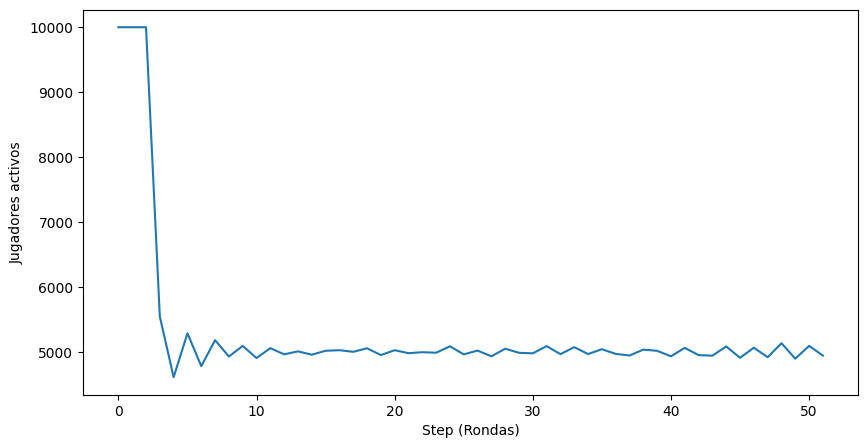

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

axs.set_xlabel("Step (Rondas)")
axs.set_ylabel("Jugadores activos")

plt.plot(cells_alive)
plt.show()

# Batch simulation

In [21]:
NUM_REPS = 100
GRID_SIZE = 10
NUM_GENERATIONS = 1000

model = GameLifeModel(GRID_SIZE, GRID_SIZE)

batch_data = dict(time=[], alive=[])
for _ in range(NUM_REPS):
    start_time = time.time()

    model.reset()
    for i in range(NUM_GENERATIONS):
        model.step()
    final_time = time.time()

    all_grids = model.datacollector.get_model_vars_dataframe()

    batch_data['time'].append(final_time - start_time)
    batch_data['alive'].append(all_grids['Live'].to_numpy())


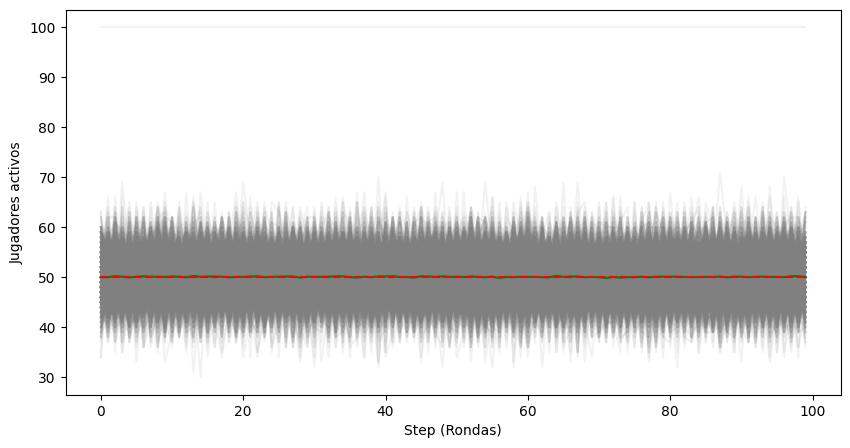

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

axs.set_xlabel("Step (Rondas)")
axs.set_ylabel("Jugadores activos")

#axs.set_prop_cycle('color', list(plt.cm.(np.linspace(0, 1, NUM_REPS))))
plt.plot(batch_data['alive'], color='Grey', alpha=0.1)

plt.plot(np.average(np.array(batch_data['alive']), axis=1), color='Green')
plt.plot(np.median(np.array(batch_data['alive']), axis=1), color='Red', linestyle='dashed')

plt.show()